In [2]:
import pandas as pd

df1 = pd.read_csv('global270.csv',names=['filename','caption'])
df2 = pd.read_csv('local270.csv',names=['filename','text'])
df3 = pd.read_csv('filenames_noTemplate.csv',names=['filename'])

#check if filenames in df1 and df2 are the same
df1_filenames = set(df1['filename'])
df2_filenames = set(df2['filename'])
df3_filenames = set(df3['filename'])
print("df1 filenames:", len(df1_filenames))
print("df2 filenames:", len(df2_filenames))
print("df3 filenames:", len(df3_filenames))
print("df1 and df2 filenames are the same:", df1_filenames == df2_filenames)
#check if filenames in df1 and df3 are the same
print("df1 and df3 filenames are the same:", df1_filenames == df3_filenames)
#check if filenames in df2 and df3 are the same
print("df2 and df3 filenames are the same:", df2_filenames == df3_filenames)

df1 filenames: 270402
df2 filenames: 270402
df3 filenames: 270402
df1 and df2 filenames are the same: True
df1 and df3 filenames are the same: True
df2 and df3 filenames are the same: True


In [40]:
import os

print(len(os.listdir('images')))

308784


In [ ]:
#check if filenames in filenames_noTemplate.csv are in sentiment_analysis_scores_270.csv
df = pd.read_csv('sentiment_analysis_scores_270.csv')
col1 = set(df['Filename'])
col2 = set(df3['filename'])

#check if filenames in filenames_noTemplate.csv are in sentiment_analysis_scores_270.csv
print("filenames in sentiment_analysis_scores_270.csv:", len(col1))
print("filenames in filenames_noTemplate.csv:", len(col2))
print("filenames in sentiment_analysis_scores_270.csv are in filenames_noTemplate.csv:", col2.issubset(col1))

#check the filenames that in filenames_noTemplate.csv but not in sentiment_analysis_scores_270.csv
diff = col2 - col1
print("filenames in filenames_noTemplate.csv but not in sentiment_analysis_scores_270.csv:", len(diff))
for filename in diff:
    print(filename)



filenames in sentiment_analysis_scores_270.csv: 300782
filenames in filenames_noTemplate.csv: 270402
filenames in sentiment_analysis_scores_270.csv are in filenames_noTemplate.csv: False
filenames in filenames_noTemplate.csv but not in sentiment_analysis_scores_270.csv: 1
meme_submissions_1409225.jpg


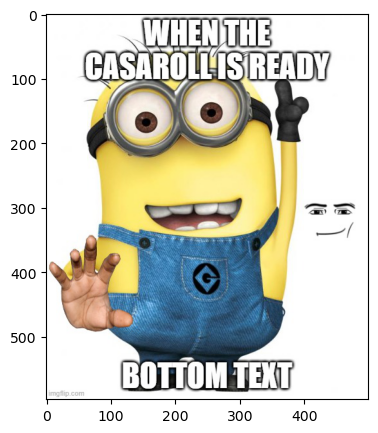

In [11]:
#display the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("images/minions_28.jpg")
plt.figure(figsize=(10, 5))
imgplot = plt.imshow(img)

In [ ]:
import torch
torch.cuda.empty_cache()

In [4]:
import pandas as pd
#get filenames_noTemplate_local.csv
df = pd.read_csv('global300.csv',names=['filename','text'])
df_filenames = df['filename']
#save to csv
df_filenames.to_csv('filenames_noTemplate_global.csv', index=False, header=False)

In [39]:
import os
import shutil

source_dir = "/home/hsdslab/Documents/Meme_project_TriAn/all_images_IMGFlip_templates"
destination_dir = "/home/hsdslab/Documents/Meme_project_TriAn/Meme_Recommendation_Final/images"

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Iterate through all files in the source directory
for filename in os.listdir(source_dir):
    source_path = os.path.join(source_dir, filename)
    destination_path = os.path.join(destination_dir, filename)

    # Check if the file is an image and if it already exists in the destination
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')):
        if not os.path.exists(destination_path):
            shutil.copy2(source_path, destination_path)
            print(f"Copied: {filename}")
        else:
            print(f"Skipped (already exists): {filename}")

Copied: no_disparen_Dont_shoot.jpg
Copied: Oh_dear_dear_gorgeus.jpg
Skipped (already exists): bad-pun-dog.jpg
Skipped (already exists): its-not-going-to-happen.jpg
Copied: Inside_you_there_are_two_wolves.jpg
Copied: Smokey_The_Bear.jpg
Copied: Sitting_Wolf.jpg
Skipped (already exists): pepe-punch.jpg
Copied: Rich_Raven.jpg
Skipped (already exists): matrix-morpheus-offer.jpg
Copied: News_Headline.jpg
Skipped (already exists): sigmund-freud.jpg
Copied: Captain_Phillips_Im_The_Captain_Now.jpg
Copied: Girls_whispering.jpg
Copied: Gangster_Baby.jpg
Copied: Alignment_Chart.jpg
Skipped (already exists): dr-evil-pinky.jpg
Copied: Thats_the_neat_part_you_dont.jpg
Copied: youtube_video_template.jpg
Skipped (already exists): what-is-my-purpose.jpg
Copied: write_that_down.jpg
Copied: skinner_pathetic.jpg
Skipped (already exists): old-guy-pc.jpg
Skipped (already exists): i-bring-a-sort-of-x-vibe-to-the-y.png
Copied: Grumpy_Cat_Birthday.jpg
Copied: Butterfly_man.jpg
Copied: Nick_Cage_and_Pedro_pasca

In [37]:
import os 

print(len(os.listdir('/home/hsdslab/Documents/Meme_project_TriAn/all_images_IMGFLIP')))

151831


In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('local270_test.csv', names=['filename', 'text'])

# Drop rows where the 'text' column is empty or contains 'None'
# Drop rows where 'text' is NaN or only whitespace
df = df[df['text'].astype(str).str.strip() != '']

# Optionally, reset the index
df = df.reset_index(drop=True)

# Save the cleaned DataFrame back to the CSV file
df.to_csv('local270_test_cleaned.csv', index=False, header=False)

print("Rows without extracted text have been removed and saved to 'local270_test_cleaned.csv'.")

Rows without extracted text have been removed and saved to 'local270_test_cleaned.csv'.


In [1]:
import numpy as np

embedding = np.load('embeddings/local298.npy')
print(embedding.shape)

(297671, 768)


In [21]:
import pandas as pd

# Load the local and global datasets
df_local = pd.read_csv('global_context/global300.csv', names=['filename', 'text'])
df_global = pd.read_csv('usage_results.csv', names=['filename', 'usage'])

# Merge the two datasets on the 'filename' column
merged_df = pd.merge(df_local, df_global, on='filename', how='inner')

# Concatenate 'text' and 'caption' into a single column 'full_context'
merged_df['topic_usage'] = merged_df[['text', 'usage']].fillna('').agg(' '.join, axis=1)

# Keep only the 'filename' and 'full_context' columns
result_df = merged_df[['filename', 'topic_usage']]

# Save the result to a new CSV file
result_df.to_csv('noTemplate_topicGlobal_usage.csv', index=False)

In [22]:
import pandas as pd

# Load usage and full‑context files
df_usage = pd.read_csv('usage_results.csv', names=['filename', 'usage'])
df_full  = pd.read_csv('full_context/IMGFLIP_fullcontext_final.csv', names=['filename', 'text'])

# Filter usage rows by filenames present in full‑context
df_filtered = df_usage[df_usage['filename'].isin(df_full['filename'])]

# Save filtered results
df_filtered.to_csv('template_noTopic_usage.csv', index=False)

In [4]:
!pkill -f python

: 

In [10]:
import numpy as np
import pandas as pd

embeddings = np.load('embeddings/template_topic_usage.npy')
text = pd.read_csv('CSV_for_embeddings/template_topic_usage.csv', names=['filename', 'text'])
print(embeddings.shape)
print(text.shape)

(153792, 768)
(153792, 2)
